## Preprocessing

In [1]:
import matplotlib.pyplot as plt

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


Cleaning the data

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

Reviewing the data for binning. Here the we will be finding the cut off amount where the largest gap exists.

In [5]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
#Since between 528 and 156 there seems to be a large gap, 520 will be used as the cutoff value.
app_vc = application_df.APPLICATION_TYPE.value_counts()
app_vc[app_vc > 520]
application_types_to_replace = list(app_vc[app_vc < 520].index)
application_types_to_replace

['T9', 'T13', 'T12', 'T2', 'T14', 'T25', 'T29', 'T15', 'T17']

In [7]:
# Choose a cutoff value and create a list of application types to be replaced (cutoff number was chosen above).
# After choosing the cutoff amount, a for loop is used in order to to replace the other amounts with "Other".
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

Plotting density to find the cutoff value for CLASSIFICATION.

(0.0, 3000.0)

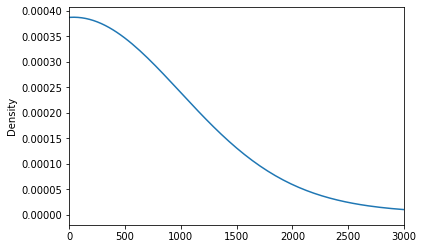

In [8]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
class_vc = application_df['CLASSIFICATION'].value_counts()
class_vc.plot.density()
plt.xlim(left = 0, right=3000)

In [9]:
classifications_to_replace = list(class_vc[class_vc < 1000].index)
classifications_to_replace

['C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C2300',
 'C7200',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C6000',
 'C1800',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1237',
 'C1235',
 'C7210',
 'C1720',
 'C4100',
 'C2400',
 'C1257',
 'C1600',
 'C0',
 'C1260',
 'C2710',
 'C1246',
 'C1267',
 'C1234',
 'C3200',
 'C1256',
 'C1248',
 'C4120',
 'C1245',
 'C8210',
 'C5200',
 'C1236',
 'C4200',
 'C2190',
 'C4500',
 'C1570',
 'C1370',
 'C1580',
 'C2150',
 'C1900',
 'C2380',
 'C6100',
 'C3700',
 'C2500',
 'C1820',
 'C1283',
 'C2170',
 'C2570',
 'C2561',
 'C1728',
 'C2600',
 'C1732']

In [10]:
len(classifications_to_replace)/len(class_vc)

0.9295774647887324

In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  already did the density version to check.

In [12]:
# Choose a cutoff value and create a list of classifications to be replaced (cutoff value was selected above from)
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
encoded_df = pd.get_dummies(application_df)
encoded_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M

Splitting the data to prep it for the test and train.

In [14]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = encoded_df['IS_SUCCESSFUL']
X = encoded_df.drop(columns = ['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


Using the StandardScaler

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
X_test_scaled

array([[ 1.39430557e-02, -3.33676580e-02, -8.91865111e-02, ...,
        -6.98784891e-02,  2.78942470e-02, -2.78942470e-02],
       [ 1.39430557e-02,  2.86802949e-02, -8.91865111e-02, ...,
         1.43105555e+01,  2.78942470e-02, -2.78942470e-02],
       [ 1.39430557e-02, -3.34843874e-02, -8.91865111e-02, ...,
        -6.98784891e-02,  2.78942470e-02, -2.78942470e-02],
       ...,
       [ 1.39430557e-02, -3.34843874e-02, -8.91865111e-02, ...,
        -6.98784891e-02,  2.78942470e-02, -2.78942470e-02],
       [ 1.39430557e-02, -3.34843874e-02, -8.91865111e-02, ...,
        -6.98784891e-02,  2.78942470e-02, -2.78942470e-02],
       [ 1.39430557e-02, -3.34843874e-02, -8.91865111e-02, ...,
        -6.98784891e-02,  2.78942470e-02, -2.78942470e-02]])

## Compile, Train and Evaluate the Model

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
num_input = len(X_train_scaled[0])
num_h1 = 80
num_h2 = 30
nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(input_dim=num_input, units=num_h1, activation='relu'))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=num_h2, activation='relu'))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Train the model
#  YOUR CODE GOES HERE
fit_nn = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5717 - accuracy: 0.7210
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5562 - accuracy: 0.7303
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5528 - accuracy: 0.7315
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5515 - accuracy: 0.7318
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5507 - accuracy: 0.7326
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5493 - accuracy: 0.7328
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5480 - accuracy: 0.7338
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5480 - accuracy: 0.7339
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5466 - accuracy: 0.7345
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5463 - accura

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5554 - accuracy: 0.7264 - 385ms/epoch - 1ms/step
Loss: 0.5553605556488037, Accuracy: 0.7264139652252197


In [26]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
nn.save('AlphabetSoupCharity.h5')

In [27]:
nn_to = tf.keras.models.load_model('AlphabetSoupCharity.h5')

could be optimazide better if using neural networks but could use another model to be simpler like random forest